<a href="https://colab.research.google.com/github/NicWickman/fastai_audio/blob/master/fastai_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
!git clone https://github.com/mogwai/fastai_audio.git
%cd fastai_audio
!bash install.sh

Updating fastai...
Done.
Cloning into 'fastai_audio'...
remote: Enumerating objects: 1579, done.
remote: Total 1579 (delta 0), reused 0 (delta 0), pack-reused 1579
Receiving objects: 100% (1579/1579), 173.65 MiB | 31.93 MiB/s, done.
Resolving deltas: 100% (918/918), done.
/content/fastai_audio
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libao-common libao4 libid3tag0 libmad0 libmagic-mgc libmagic1
  libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa libsox-fmt-ao
  libsox-fmt-base libsox-fmt-mp3 libsox-fmt-oss libsox-fmt-pulse libsox3
Suggested packages:
  libaudio2 file
The following NEW packages will be installed:
  libao-common libao4 libid3tag0 libmad0 libmagic-mgc libmagi

In [0]:
from audio import *  
from fastai.basics import *

In [0]:
data_url = 'http://www.openslr.org/resources/45/ST-AEDS-20180100_1-OS'
data_folder = datapath4file(url2name(data_url))
untar_data(data_url, dest=data_folder)

PosixPath('/root/.fastai/data/ST-AEDS-20180100_1-OS/ST-AEDS-20180100_1-OS')

In [0]:
label_pattern = r'_([mf]\d+)_'
config = AudioConfig()
config.segment_size = 1000
# config.resample_to = 8000
config.remove_silence = None
config.f_max = 8000
config.silence_threshold = 30
config.max_to_pad = 1000
config.silence_padding = 300
audios = AudioList.from_folder(data_folder, config=config).split_by_rand_pct(.2, seed=4).label_from_re(label_pattern)
audios

Preprocessing: Segmenting Items


Preprocessing: Segmenting Items


LabelLists;

Train: AudioLabelList (15274 items)
x: AudioList
AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz)
y: CategoryList
f0001,f0001,f0001,f0001,f0001
Path: /root/.fastai/data/ST-AEDS-20180100_1-OS;

Valid: AudioLabelList (3806 items)
x: AudioList
AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz)
y: CategoryList
f0005,f0005,f0005,f0005,f0003
Path: /root/.fastai/data/ST-AEDS-20180100_1-OS;

Test: None

------------------------------------------------------------
File: /root/.fastai/cache/s_1000/f0001_us_f0001_00328.wav-7d1dacdd666ce4675322be69e5ee3a30/0.wav
Total Length: 1.0 seconds
Number of Channels: 1
Label: f0001


Channel 0.0 (128x63):


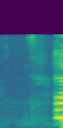

------------------------------------------------------------
File: /root/.fastai/cache/s_1000/f0001_us_f0001_00328.wav-7d1dacdd666ce4675322be69e5ee3a30/1.wav
Total Length: 1.0 seconds
Number of Channels: 1
Label: f0001


Channel 0.0 (128x63):


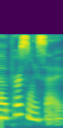

------------------------------------------------------------
File: /root/.fastai/cache/s_1000/f0001_us_f0001_00328.wav-7d1dacdd666ce4675322be69e5ee3a30/2.wav
Total Length: 1.0 seconds
Number of Channels: 1
Label: f0001


Channel 0.0 (128x63):


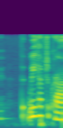

In [0]:
db = audios.databunch(bs=128)
db.show_batch()
learn = audio_learner(db)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


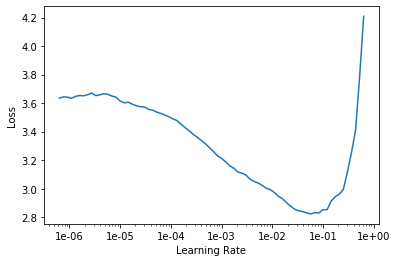

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, slice(1e-4, 4e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.405800,0.710532,0.741198,00:37
1,0.607299,0.471753,0.829217,00:08


[('f0004', 'm0005', 36),
 ('f0004', 'f0005', 33),
 ('f0001', 'f0004', 29),
 ('f0001', 'm0005', 27),
 ('m0004', 'm0003', 21)]

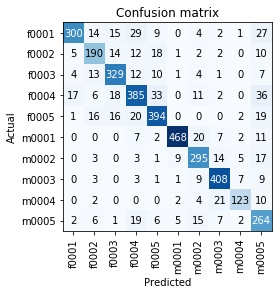

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused()[:5]

In [0]:
preds = audio_predict(learn, AudioItem(path=data_folder.ls()[500])); preds

(Category f0002,
 tensor(1),
 tensor([9.4534e-05, 9.5850e-01, 7.3491e-03, 9.1389e-04, 3.2946e-02, 1.2781e-06,
         5.2155e-07, 8.0248e-05, 1.0010e-04, 1.1170e-05]))